# ANIME RECOMMENDER SYSTEM - EDA (EXPLORATORY DATA ANALYSIS) - ANIME

In [1]:
# basic library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
rating_df = pd.read_csv('dataset/cleaned_dataset/rating.csv')
rating_df.head()

,user_id,score,num_watched_episodes,created_at,updated_at,anime_id
0,2,4,1,1648845810,1648845810,51478
1,2,4,1,1415823823,1415823823,20707
2,2,5,1,1331102346,1373812370,6408
3,2,5,1,1561119148,1561119148,38045
4,2,6,1,1633699468,1633699468,49668


In [3]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722920 entries, 0 to 1722919
Data columns (total 6 columns):
 #   Column                Dtype
---  ------                -----
 0   user_id               int64
 1   score                 int64
 2   num_watched_episodes  int64
 3   created_at            int64
 4   updated_at            int64
 5   anime_id              int64
dtypes: int64(6)
memory usage: 78.9 MB


In [4]:
rating_df.head()

,user_id,score,num_watched_episodes,created_at,updated_at,anime_id
0,2,4,1,1648845810,1648845810,51478
1,2,4,1,1415823823,1415823823,20707
2,2,5,1,1331102346,1373812370,6408
3,2,5,1,1561119148,1561119148,38045
4,2,6,1,1633699468,1633699468,49668


## essential function for analysis/visualisation:

In [5]:
# print average
def printAvg(df, col):
    print("Average: " + str(df[col].mean()))

In [6]:
# kdeplot figure
def fig_kdeplot(df, col, title):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = df[col].hist(bins=50, density=True, alpha=0.5, color='purple')
    ax = sns.kdeplot(data=df, x=col, shade=False, alpha=0.9, linewidth=3)
    ax.set_title(title, fontsize=24)
    plt.show()

In [7]:
# plot comma seperated list
def fig_comma_list(df, col, title): 
    # count
    flat = itertools.chain(*df[col].values.tolist())
    count = collections.Counter(flat)

    plot = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':col, 0:'count'})
    plot.sort_values('count', ascending=False, inplace=True)

    # plot
    fig = plt.figure(figsize=(12,10))
    fig.set_facecolor('white')
    ax = sns.barplot(data=plot, x='count', y=col, palette='Set2')
    ax.set_title(title, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.show()

In [8]:
# countplot figure
def fig_countplot(df, col, sort, title, rotate):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    if (sort): ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    else: ax = sns.countplot(data=df, x=col, palette='Set2')
    ax.set_title(title, fontsize=20)
    if(rotate): ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
    else: ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    plt.show()

In [9]:
# boxplot figure
def fig_boxplot(df,col, title):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.boxplot(df[col])
    ax.set_title(title, fontsize=24)
    plt.show()

In [10]:
# top 10 barplot figure
def fig_topn_barplot(df, name, col, n, title):   
    temp = df.nlargest(n, [col])
    temp = temp[[name, col]]

    # plot
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.barplot(data=temp, x=col, y=name, palette='Set2')
    ax.set_title(title, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.show()

In [11]:
# top 10 barplot figure
def fig_topn_barplot_asc(df, name, col, n, title):   
    temp = df.nsmallest(n, [col])
    temp = temp[[name, col]]

    # plot
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.barplot(data=temp, x=col, y=name, palette='Set2')
    ax.set_title(title, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.show()

## ANALYSE EACH FEATURES

### score

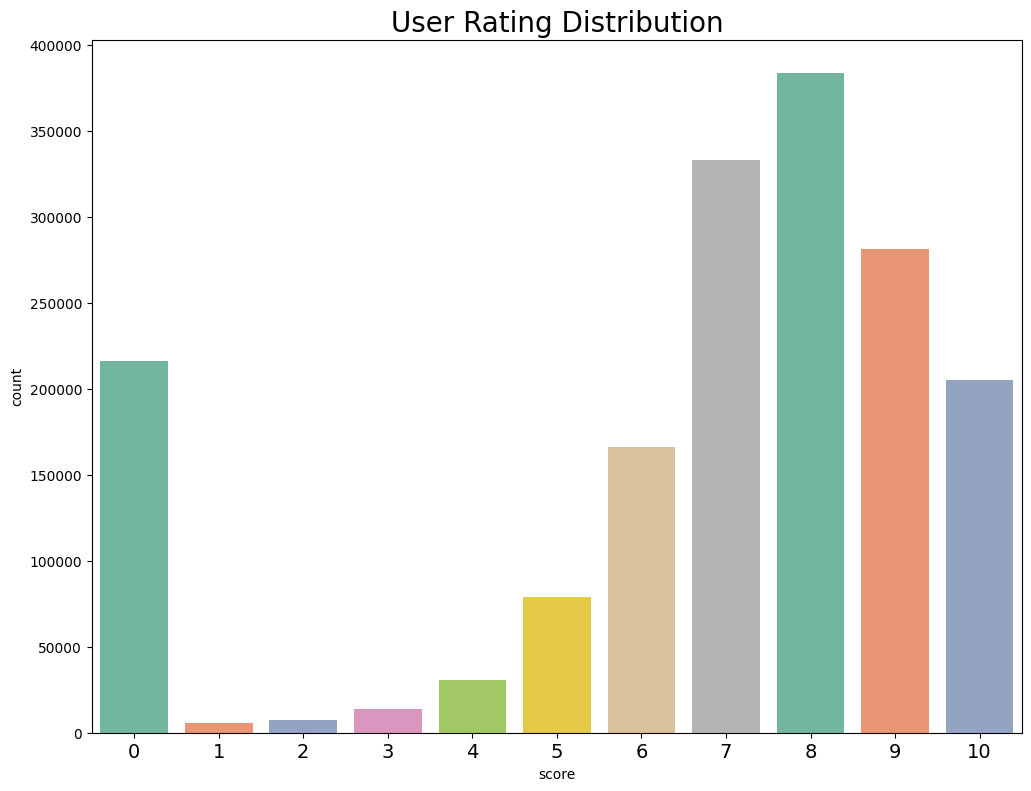

Average: 6.713036008636501


In [12]:
fig_countplot(rating_df, 'score', False, 'User Rating Distribution', False)
printAvg(rating_df, 'score')

In [13]:
rating_df_temp = rating_df.copy()
rating_df_temp.drop(rating_df_temp.loc[rating_df_temp['score']==0].index, inplace=True)

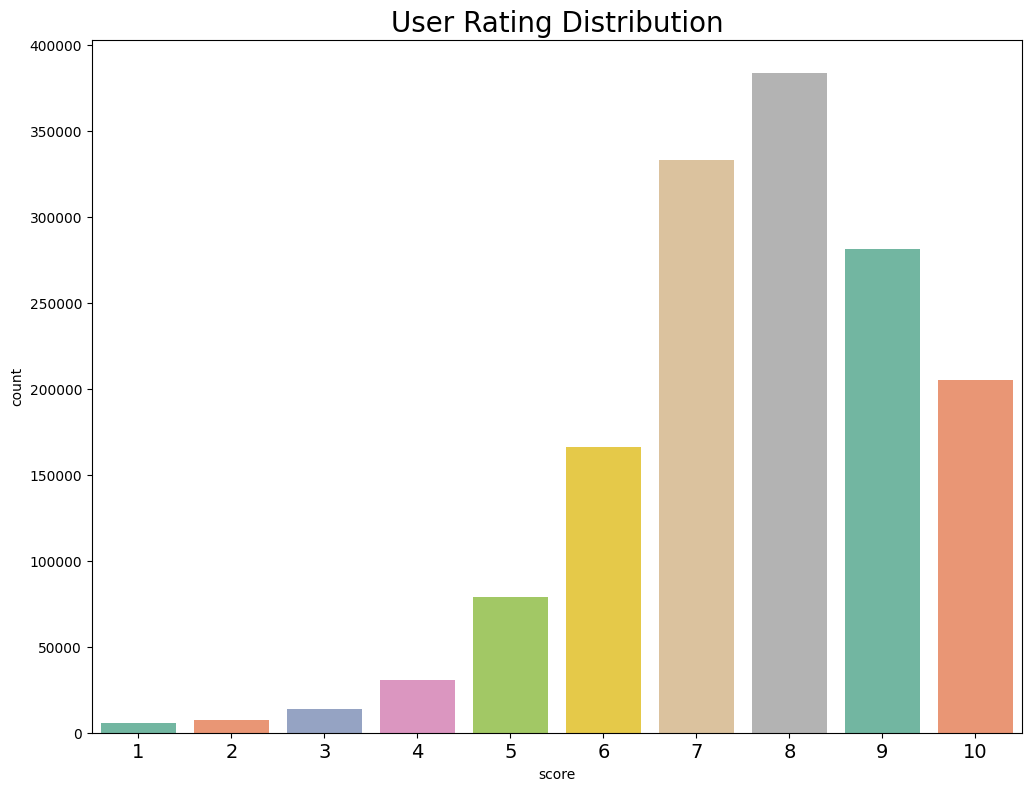

Average: 7.677123401238719


In [14]:
fig_countplot(rating_df_temp, 'score', False, 'User Rating Distribution', False)
printAvg(rating_df_temp, 'score')

In [15]:
rating_df.count()

user_id                 1722920
score                   1722920
num_watched_episodes    1722920
created_at              1722920
updated_at              1722920
anime_id                1722920
dtype: int64

In [16]:
rating_df_temp.count()

user_id                 1506557
score                   1506557
num_watched_episodes    1506557
created_at              1506557
updated_at              1506557
anime_id                1506557
dtype: int64

num_watched_episode

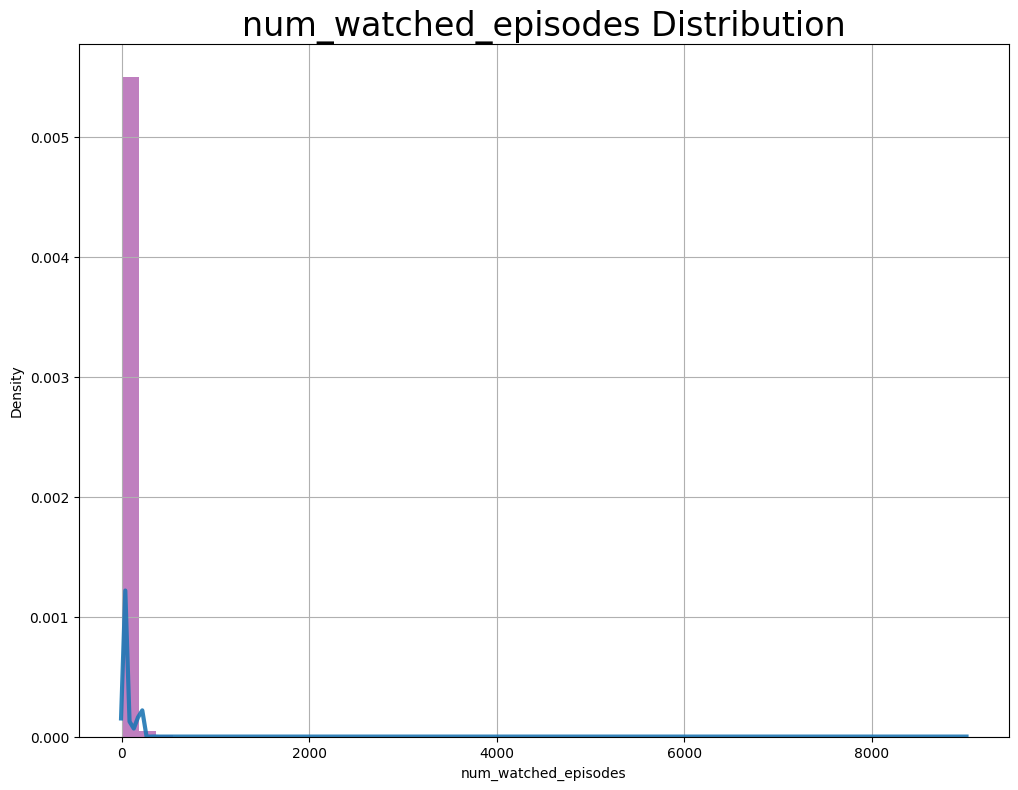

Average: 17.80784249994196


In [19]:
fig_kdeplot(rating_df, 'num_watched_episodes', 'num_watched_episodes Distribution')
printAvg(rating_df, 'num_watched_episodes')

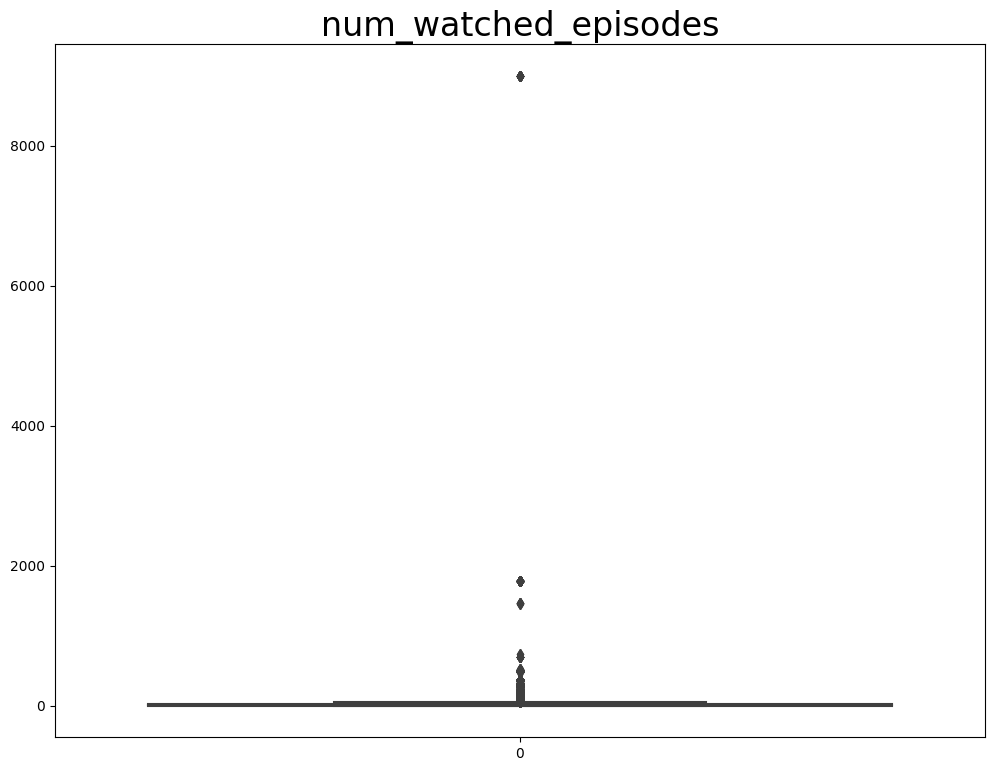

In [20]:
fig_boxplot(rating_df, 'num_watched_episodes', 'num_watched_episodes')

In [23]:
rating_df_temp = rating_df.copy()
rating_df_temp.drop(rating_df_temp.loc[rating_df_temp['num_watched_episodes']>1000].index, inplace=True)

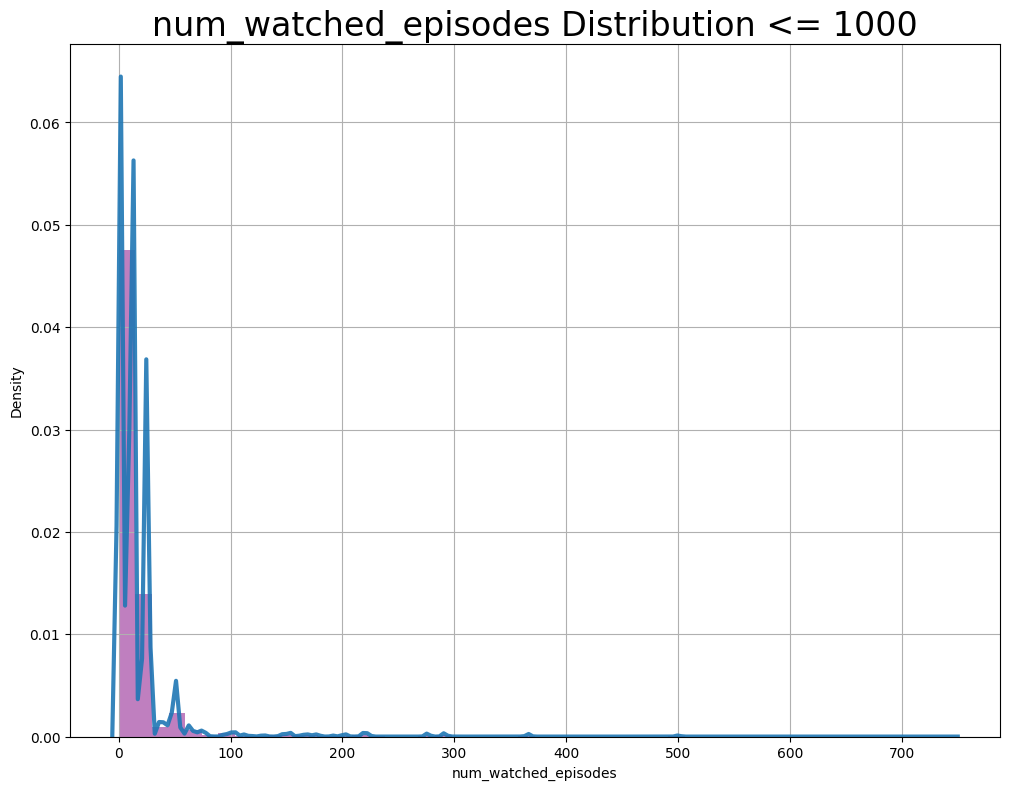

Average: 17.47030756147892


In [24]:
fig_kdeplot(rating_df_temp, 'num_watched_episodes', 'num_watched_episodes Distribution <= 1000')
printAvg(rating_df_temp, 'num_watched_episodes')

created_at updated_at

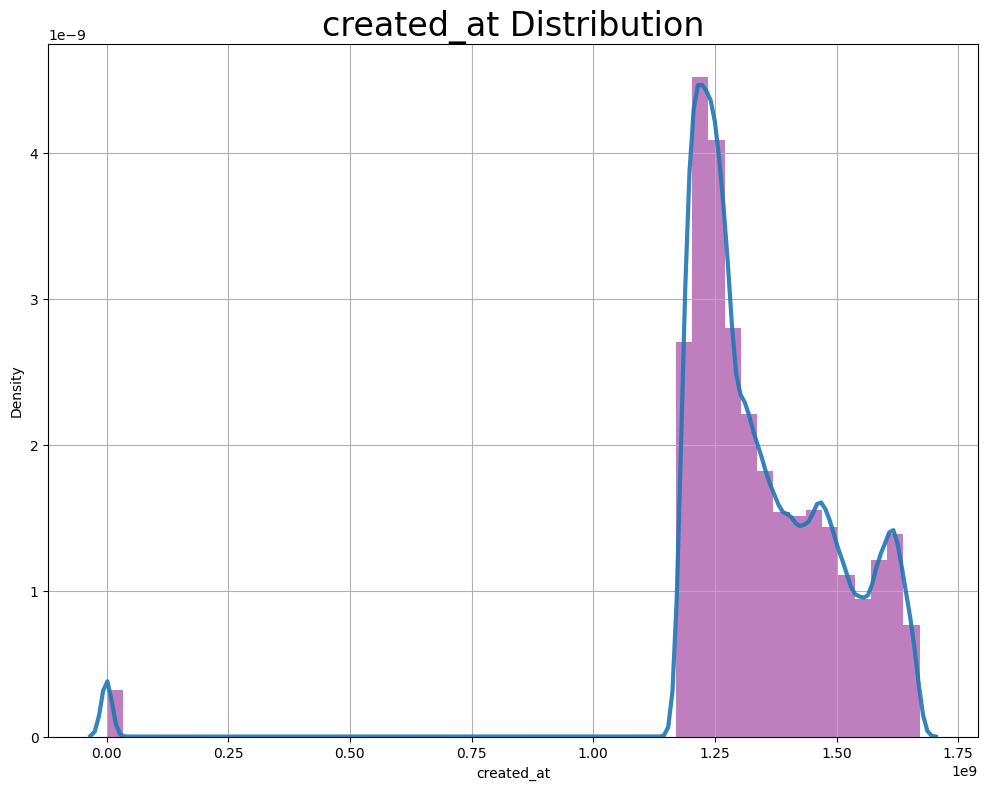

Average: 1339968008.3423576


In [17]:
fig_kdeplot(rating_df, 'created_at', 'created_at Distribution')
printAvg(rating_df, 'created_at')

In [18]:
rating_df_temp = rating_df.copy()
rating_df_temp.drop(rating_df_temp.loc[rating_df_temp['created_at']==0].index, inplace=True)

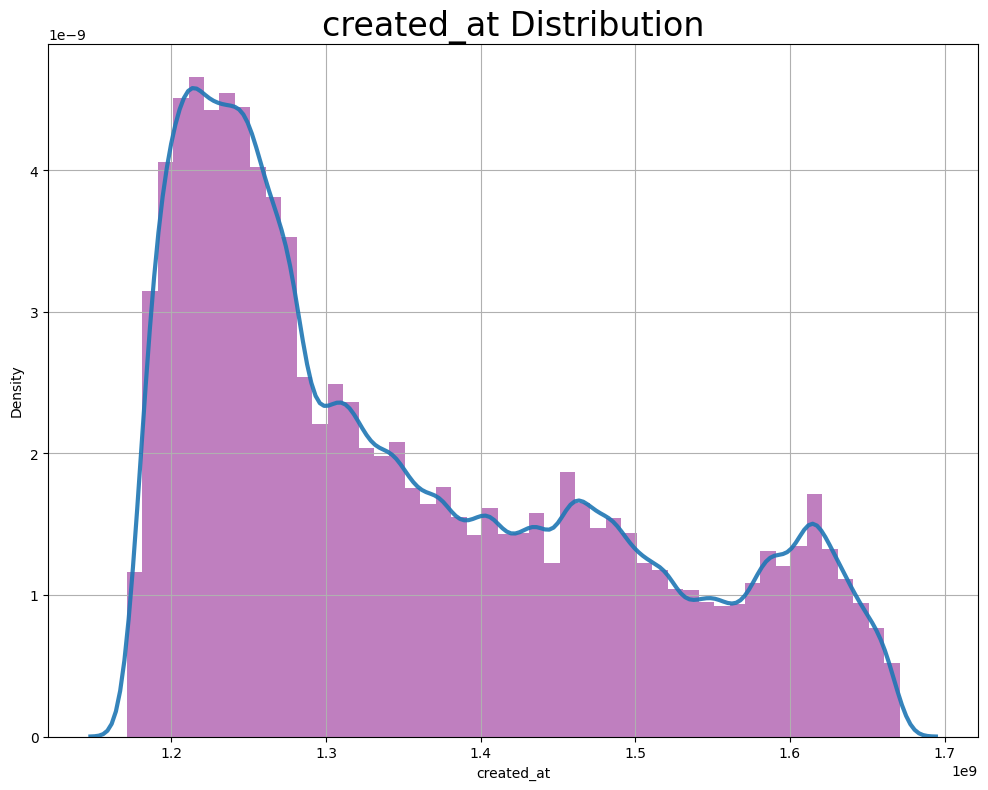

Average: 1354365988.190345


In [19]:
fig_kdeplot(rating_df_temp, 'created_at', 'created_at Distribution')
printAvg(rating_df_temp, 'created_at')

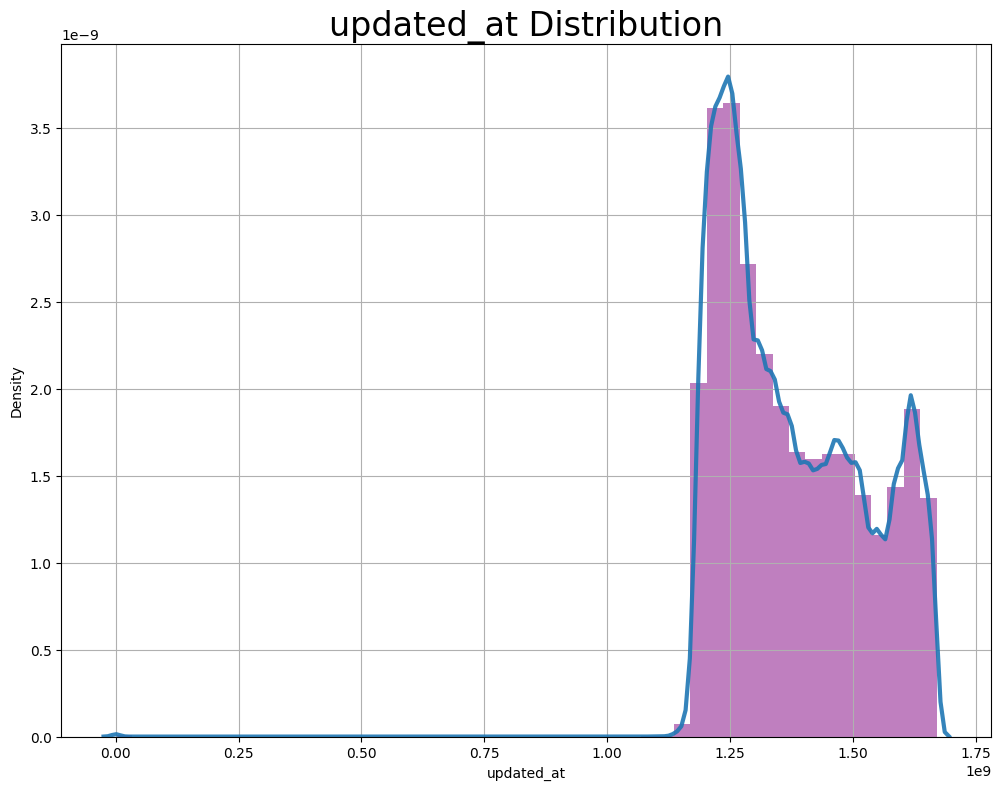

Average: 1379596547.8691502


In [20]:
fig_kdeplot(rating_df, 'updated_at', 'updated_at Distribution')
printAvg(rating_df, 'updated_at')

In [21]:
rating_df_temp = rating_df.copy()
rating_df_temp.drop(rating_df_temp.loc[rating_df_temp['updated_at']==0].index, inplace=True)

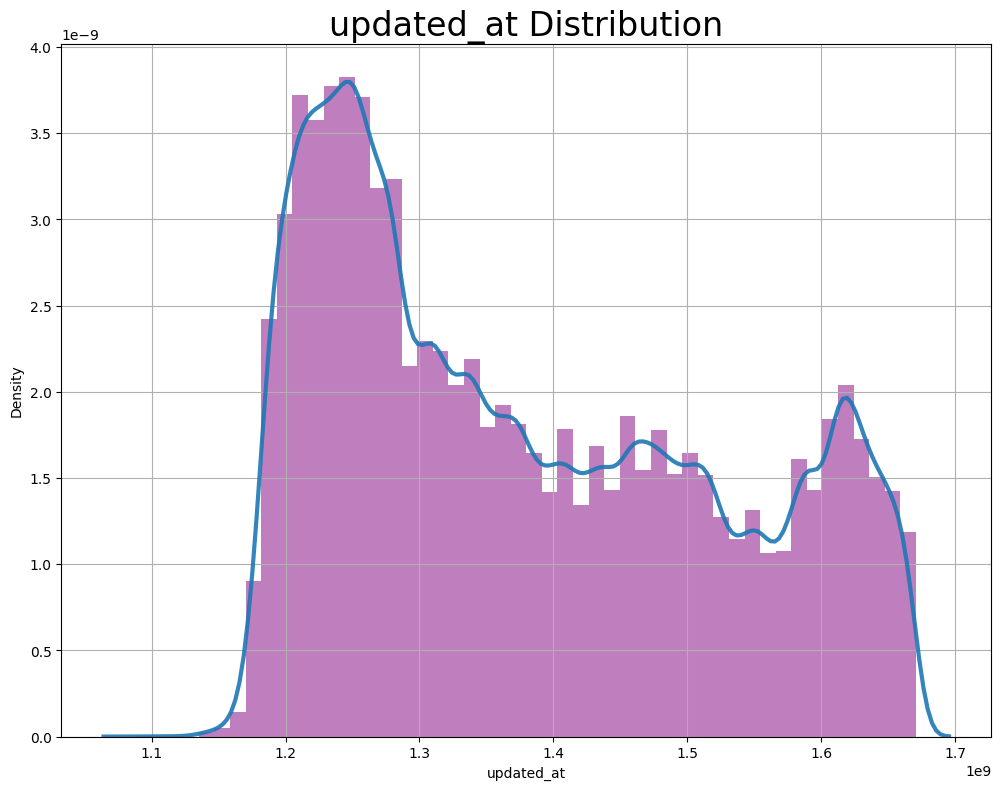

Average: 1379993023.9370167


In [22]:
fig_kdeplot(rating_df_temp, 'updated_at', 'updated_at Distribution')
printAvg(rating_df_temp, 'updated_at')

<AxesSubplot: >

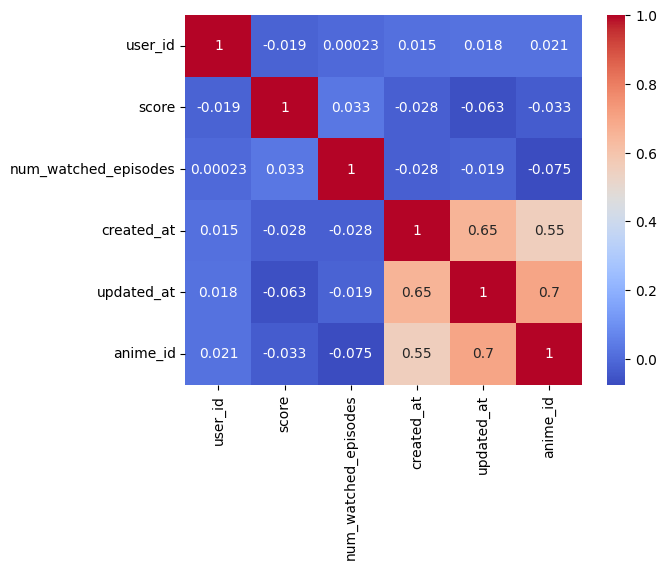

In [24]:
feature_corr = rating_df.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

<AxesSubplot: >

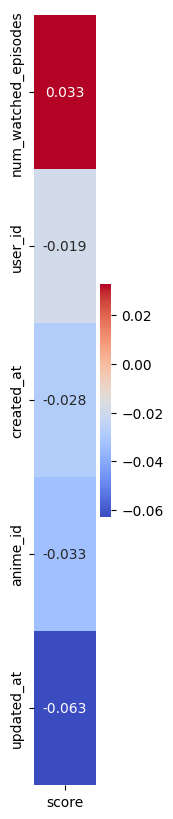

In [26]:
fig = plt.figure(figsize=(1,10))
fig.set_facecolor('white')
sns.heatmap(rating_df.corr()[['score']].sort_values('score', ascending=False)[1:], annot=True, cmap="coolwarm")